In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Recurrent Neural Network***

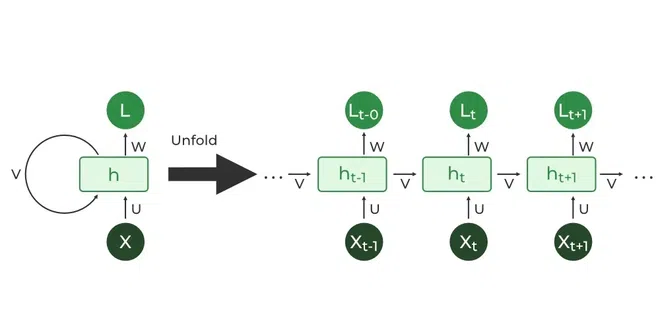

***RNN disadvantages***


1.   The RNN is weak.
2.   RNN dosne't have long term memory.
3.   RNN short-term memory is around 4 to 5 time steps.
4.   Vanshing gradiant problem



# ***Long Short Term Momory***

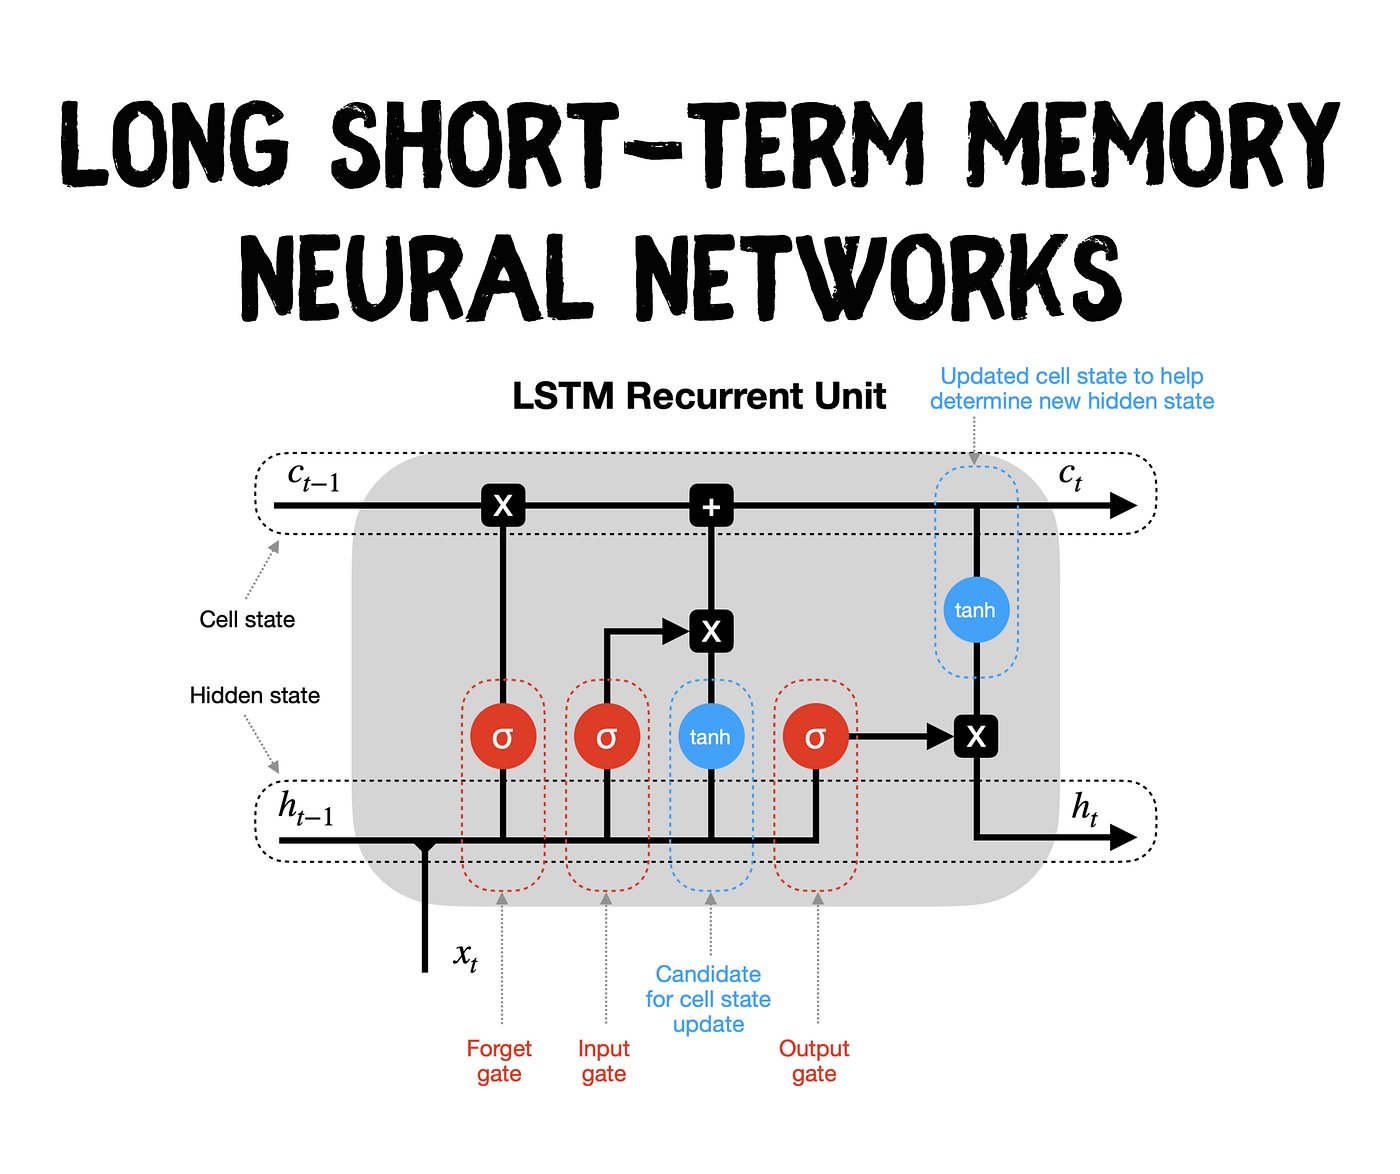



1.   LSTM has benefit of both short and long term memory
2.   LSTM has 3 inputs
3.   LSTM has 2 outputs



# ***Gate Recuurent Unit***

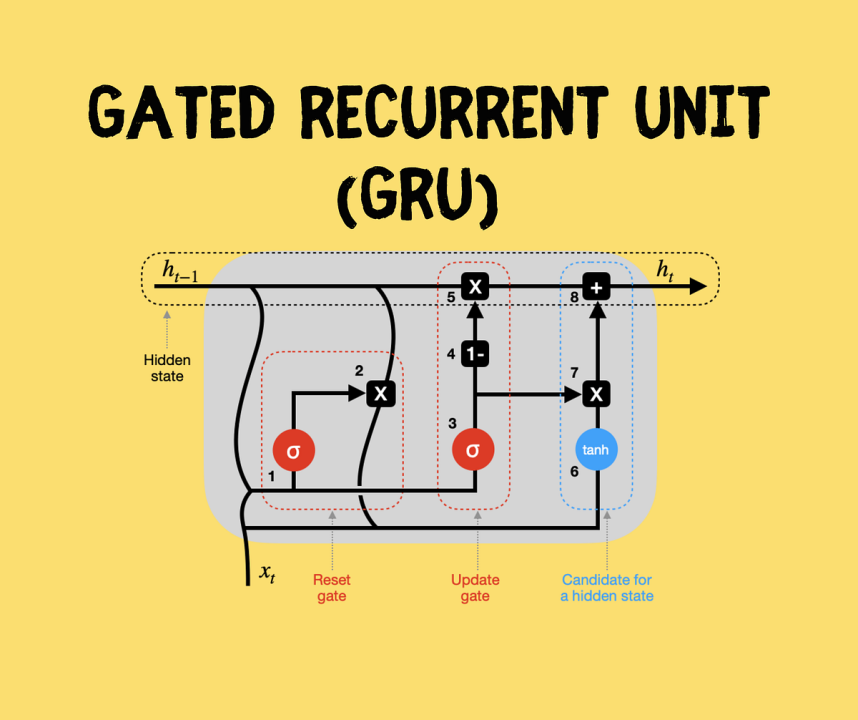

# ***GRU benefits***

1.   GRU is faster then LSTM
2.   GRU is more easy to understand.
3.   GRU takes less resource to be trained.
4.   You should't combine GRU with LSTM.



# ***GRU drawbacks***


*   It is realatively weak compared to LSTM for final classification.
*   Similar architectures to LSTM won't reach to same performances.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/full.regular.txt', delim_whitespace=True)

In [4]:
data.describe()

,0,0.000,0.000.1,0.000.2,1,1.1,1.2,1.3,1.4,0.1
count,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1.079133e+06,1079133.0
mean,1.502021e+02,5.965603e+00,7.416875e+00,9.035807e+00,1.504170e-02,7.553749e-02,2.246748e-01,8.234490e-01,2.491768e+00,0.0
std,1.267608e+02,8.436803e-01,2.182458e+00,3.029510e+00,1.221747e-01,2.767069e-01,4.954270e-01,1.201071e+00,2.386876e+00,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.500000e+01,5.467000e+00,5.278000e+00,6.272000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.0
50%,1.180000e+02,5.795000e+00,7.869000e+00,8.905000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.0
75%,2.140000e+02,6.563000e+00,9.370000e+00,1.184800e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,0.0
max,1.015000e+03,7.826000e+00,1.159000e+01,1.492200e+01,2.000000e+00,4.000000e+00,6.000000e+00,1.000000e+01,1.800000e+01,0.0


In [5]:
y = data.iloc[:, 2]
X = data.iloc[:, 3:11]

In [6]:
X_samll = X.iloc[0:300000,0:]
y_samll = y.iloc[0:300000]

In [7]:
y.value_counts()

C
H    459325
C    377953
E    241855
Name: count, dtype: int64

In [8]:
target_encoding = []
for x in y_samll:
  if x == "H":
    target_encoding.append(0)
  elif x == "C":
    target_encoding.append(1)
  else:
      target_encoding.append(2)
target_encoding = np.array(target_encoding)

In [9]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X_samll, target_encoding)

In [10]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_samll,target_encoding)

In [11]:
X_over.shape

(119978, 8)

In [12]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_samll, target_encoding)

In [13]:
X_sm.shape

(127227, 8)

In [14]:
X_total =pd.concat([X_over,X_sm],axis=0)
Y_total =pd.concat([pd.DataFrame(y_over),pd.DataFrame(y_sm)],axis=0)

In [15]:
X_total.shape

(247205, 8)

In [16]:
Y_total.shape

(247205, 1)

In [17]:
target_encoding = []
for x in np.array(y_over).ravel():
  if x == 0:
    target_encoding.append([1, 0, 0])
  elif x == 1:
    target_encoding.append([0, 1, 0])
  else:
      target_encoding.append([0, 0, 1])
target_encoding = np.array(target_encoding)

In [18]:
target_encoding.shape

(119978, 3)

In [19]:
pd.DataFrame(target_encoding).value_counts()

0  1  2
0  0  1    42409
1  0  0    42409
0  1  0    35160
Name: count, dtype: int64

In [50]:
import numpy as np
X_tensor = np.array(X_over).reshape(X_over.shape[0],X_over.shape[1],1)

In [51]:
print(X_tensor.shape)

(119978, 8, 1)


In [37]:
import tensorflow as tf

#from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv1D,MaxPooling1D,Activation,Flatten,AveragePooling1D,GlobalMaxPooling1D,ZeroPadding1D, GlobalAveragePooling1D
#from tensorflow.python.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras

# ***Combiantion of CNN with LSTM***


1.   First and second layer for spatial feature extraction
2.   Third and fourth for the time dependent feature extraction



In [52]:
model =  keras.models.Sequential()
model.add(layer=keras.layers.Conv1D(filters = 8, kernel_size = 3, activation='relu',padding='same'))
model.add(layer=keras.layers.Conv1D(filters = 16, kernel_size = 3, activation='relu',padding='same'))
model.add(layer=keras.layers.LSTM(16, activation='tanh',return_sequences=True))
model.add(layer=keras.layers.LSTM(40, activation='tanh',return_sequences=True))
model.add(layer=keras.layers.Flatten())
model.add(keras.layers.Dense(40, activation="elu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [53]:
model.compile(loss="categorical_crossentropy",
 optimizer="Adam",
 metrics=["accuracy"])

In [54]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, target_encoding, test_size=0.20, random_state=0)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(95982, 3)
(23996, 3)
(95982, 8, 1)
(23996, 8, 1)


In [56]:
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [58]:
history = model.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test),batch_size = 4096,validation_batch_size=4096, callbacks=[tensorboard_callback])

Epoch 1/1000
24/24 [==============================] - 1s 23ms/step - loss: 0.4735 - accuracy: 0.7936 - val_loss: 0.4877 - val_accuracy: 0.7877
Epoch 2/1000
24/24 [==============================] - 0s 18ms/step - loss: 0.4786 - accuracy: 0.7906 - val_loss: 0.4878 - val_accuracy: 0.7895
Epoch 3/1000
24/24 [==============================] - 0s 20ms/step - loss: 0.4751 - accuracy: 0.7926 - val_loss: 0.4770 - val_accuracy: 0.7932
Epoch 4/1000
24/24 [==============================] - 0s 20ms/step - loss: 0.4750 - accuracy: 0.7920 - val_loss: 0.4829 - val_accuracy: 0.7901
Epoch 5/1000
24/24 [==============================] - 1s 24ms/step - loss: 0.4755 - accuracy: 0.7916 - val_loss: 0.4817 - val_accuracy: 0.7910
Epoch 6/1000
24/24 [==============================] - 1s 22ms/step - loss: 0.4742 - accuracy: 0.7929 - val_loss: 0.4770 - val_accuracy: 0.7937
Epoch 7/1000
24/24 [==============================] - 0s 18ms/step - loss: 0.4723 - accuracy: 0.7939 - val_loss: 0.4775 - val_accuracy: 0.7936

In [ ]:
%tensorboard --logdir logs

In [61]:
model1 =  keras.models.Sequential()
model1.add(layer=keras.layers.Conv1D(filters = 8, kernel_size = 3, activation='relu',padding='same'))
model1.add(layer=keras.layers.Conv1D(filters = 16, kernel_size = 3, activation='relu',padding='same'))
model1.add(layer=keras.layers.GRU(16, activation='tanh',return_sequences=True))
model1.add(layer=keras.layers.GRU(40, activation='tanh',return_sequences=True))
model1.add(layer=keras.layers.Flatten())
model1.add(keras.layers.Dense(40, activation="elu"))
model1.add(keras.layers.Dense(3, activation="softmax"))

In [62]:
model1.compile(loss="categorical_crossentropy",
 optimizer="Adam",
 metrics=["accuracy"])

In [63]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [64]:
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [65]:
history = model1.fit(X_train, y_train, epochs=1000,validation_data=(X_test, y_test),batch_size = 4096,validation_batch_size=4096, callbacks=[tensorboard_callback])

Epoch 1/1000
24/24 [==============================] - 5s 44ms/step - loss: 0.9673 - accuracy: 0.5492 - val_loss: 0.7436 - val_accuracy: 0.6780
Epoch 2/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.6544 - accuracy: 0.7127 - val_loss: 0.6173 - val_accuracy: 0.7358
Epoch 3/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.6079 - accuracy: 0.7399 - val_loss: 0.5955 - val_accuracy: 0.7432
Epoch 4/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.5874 - accuracy: 0.7465 - val_loss: 0.5749 - val_accuracy: 0.7505
Epoch 5/1000
24/24 [==============================] - 0s 14ms/step - loss: 0.5682 - accuracy: 0.7525 - val_loss: 0.5583 - val_accuracy: 0.7598
Epoch 6/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.5523 - accuracy: 0.7592 - val_loss: 0.5462 - val_accuracy: 0.7638
Epoch 7/1000
24/24 [==============================] - 0s 15ms/step - loss: 0.5438 - accuracy: 0.7649 - val_loss: 0.5566 - val_accuracy: 0.7580

In [ ]:
%tensorboard --logdir logs